In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
#Importing reuired datasets
weather=pd.read_csv("Dataset Uk/weather_daily_darksky.csv")
energy=pd.read_csv("Dataset Uk/daily_dataset/daily_dataset/block_0.csv")
holiday=pd.read_csv("Dataset Uk/uk_bank_holidays.csv")


In [93]:
#Combining the daily datasets into one dataframe named daily
energy=energy[['day','LCLid','energy_sum']]
for i in range(1,112):
    df = pd.read_csv("Dataset Uk/daily_dataset/daily_dataset/block_"+str(i)+".csv")
    df=df[['day','LCLid','energy_sum']]
    energy=pd.concat([energy,df],ignore_index=True)
    energy.reset_index(drop=True,inplace=True)
        
        

In [94]:
energy['day'] = pd.to_datetime(energy['day'])

In [95]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   day         datetime64[ns]
 1   LCLid       object        
 2   energy_sum  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 80.3+ MB


In [96]:
energy = energy.groupby('day').agg({
    'energy_sum': 'sum',  # Sum of energy for each day
    'LCLid': 'nunique'    # Count of unique houses for each day
}).reset_index()
energy.head()

,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41


In [97]:
energy['LCLid'].unique()

array([  13,   25,   32,   41,   55,   63,   76,   92,  100,  110,  126,
        132,  152,  167,  184,  201,  216,  224,  232,  252,  262,  280,
        310,  329,  349,  367,  378,  387,  402,  411,  418,  420,  421,
        423,  424,  425,  429,  434,  436,  439,  447,  449,  454,  464,
        480,  493,  509,  516,  527,  533,  546,  554,  567,  581,  590,
        608,  627,  634,  655,  667,  674,  681,  696,  700,  708,  713,
        725,  733,  736,  738,  754,  765,  780,  791,  802,  805,  819,
        828,  843,  852,  863,  865,  873,  888,  898,  908,  918,  925,
        943,  962,  980, 1005, 1033, 1040, 1071, 1093, 1123, 1144, 1181,
       1189, 1203, 1217, 1228, 1230, 1234, 1235, 1268, 1291, 1317, 1341,
       1342, 1340, 1370, 1403, 1443, 1479, 1498, 1548, 1599, 1649, 1697,
       1742, 1764, 1763, 1813, 1863, 1909, 1955, 2018, 2034, 2035, 2111,
       2178, 2240, 2294, 2338, 2357, 2358, 2359, 2462, 2524, 2586, 2665,
       2685, 2772, 2852, 2909, 2995, 3081, 3105, 31

In [98]:
housecount = energy[['day','LCLid']].set_index('day')
housecount.head(4)

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41


<AxesSubplot:xlabel='day'>

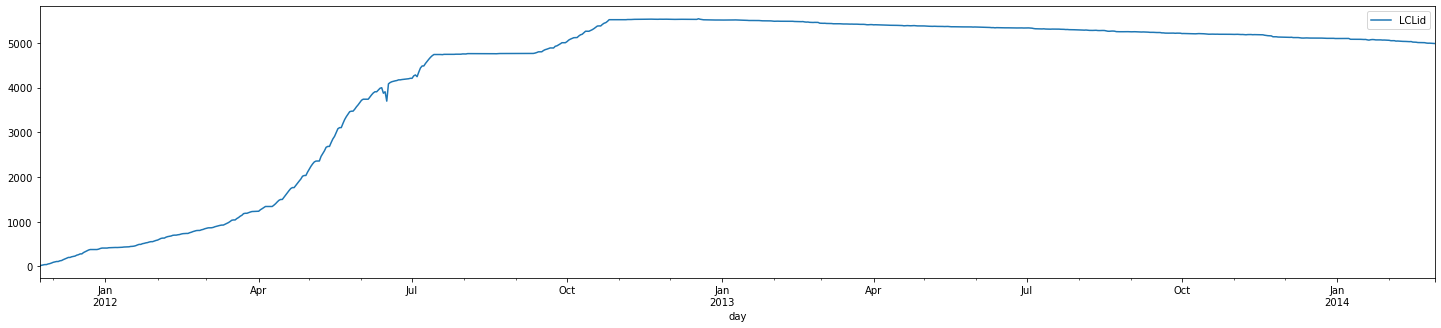

In [99]:
housecount.plot(figsize=(25,5))

In [100]:
energy.head()

,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41


In [101]:
energy.count()

day           829
energy_sum    829
LCLid         829
dtype: int64

In [102]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   day         829 non-null    datetime64[ns]
 1   energy_sum  829 non-null    float64       
 2   LCLid       829 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 19.6 KB


In [103]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date

In [104]:
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy.day))
print("Ending Point of Data at Day Level",max(energy.day))
# 2 years, 3 months, 5 days

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [105]:
energy.describe()

,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,42870.715689,4234.539204,10.358458
std,20141.286953,1789.994799,1.886206
min,90.385000,13.000000,0.208997
25%,34421.895002,4084.000000,8.565752
50%,45846.575997,5138.000000,10.372293
75%,58795.512000,5369.000000,11.832222
max,82650.492003,5541.000000,15.940238


In [106]:
#Now Start with the weather dataset and Observe it
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
temperatureMax,882.0,13.660113,6.182744,-0.06,9.5025,12.625,17.9200,32.40
windBearing,882.0,195.702948,89.340783,0.00,120.5000,219.000,255.0000,359.00
dewPoint,882.0,6.530034,4.830875,-7.84,3.1800,6.380,10.0575,17.77
cloudCover,881.0,0.477605,0.193514,0.00,0.3500,0.470,0.6000,1.00
windSpeed,882.0,3.581803,1.694007,0.20,2.3700,3.440,4.5775,9.96
pressure,882.0,1014.127540,11.073038,979.25,1007.4350,1014.615,1021.7550,1040.92
apparentTemperatureHigh,882.0,12.723866,7.279168,-6.46,7.0325,12.470,17.9100,32.42
visibility,882.0,11.167143,2.466109,1.48,10.3275,11.970,12.8300,15.34
humidity,882.0,0.781871,0.095348,0.43,0.7200,0.790,0.8600,0.98
apparentTemperatureLow,882.0,6.085045,6.031967,-8.88,1.5225,5.315,11.4675,20.54


In [107]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [108]:
weather.head(2)


,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,day
0,11.96,123,9.40,0.79,3.88,1016.08,10.87,3.30,0.95,10.87,11.96,1.0,10.87,8.85,10.87,6.48,0.52,2011-11-11
1,8.59,198,4.49,0.56,3.94,1007.71,5.62,12.09,0.88,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53,2011-12-11


In [109]:
weather_energy =  energy.merge(weather,on='day')
weather_energy['avg_temperature'] = (weather_energy['temperatureMax']+weather_energy['temperatureMin'])/2
weather_energy.head(2)

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,avg_temperature
0,2011-11-23,90.385,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94,7.085
1,2011-11-24,213.412,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,10.745


In [110]:
def plot_energy_sum(weather_energy, columns_to_plot):
    for column in columns_to_plot:
        fig, ax1 = plt.subplots(figsize=(20, 5))

        ax1.plot(weather_energy.day, getattr(weather_energy, column), color='tab:orange')
        ax1.set_ylabel(column, color='tab:orange')

        ax2 = ax1.twinx()
        ax2.plot(weather_energy.day, weather_energy.avg_energy, color='tab:blue')
        ax2.set_ylabel('Average Energy/Household', color='tab:blue')

        plt.title(f'Energy Consumption and {column}')
        fig.tight_layout()

        plt.show()

In [111]:
columns_to_plot = ['avg_temperature', 'cloudCover', 'windSpeed', 'pressure',
        'visibility', 'humidity', 'uvIndex',]

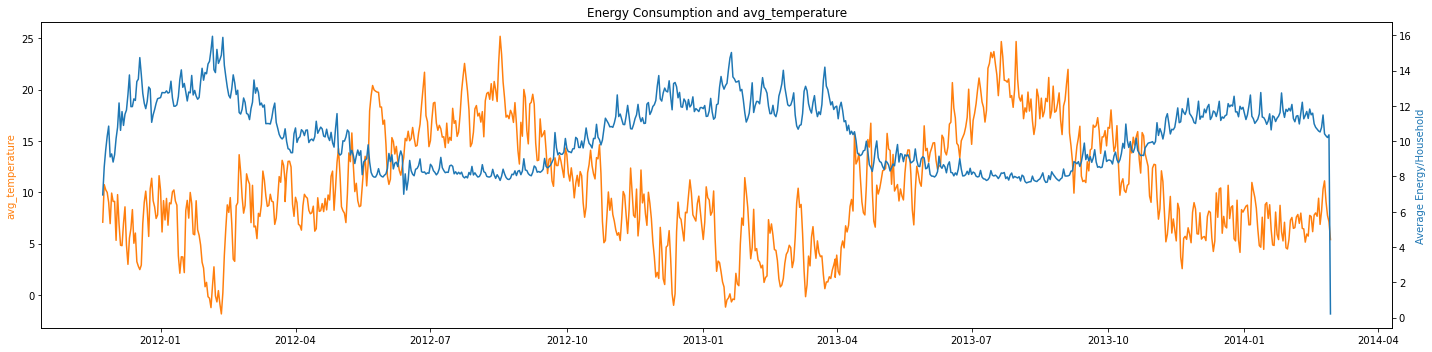

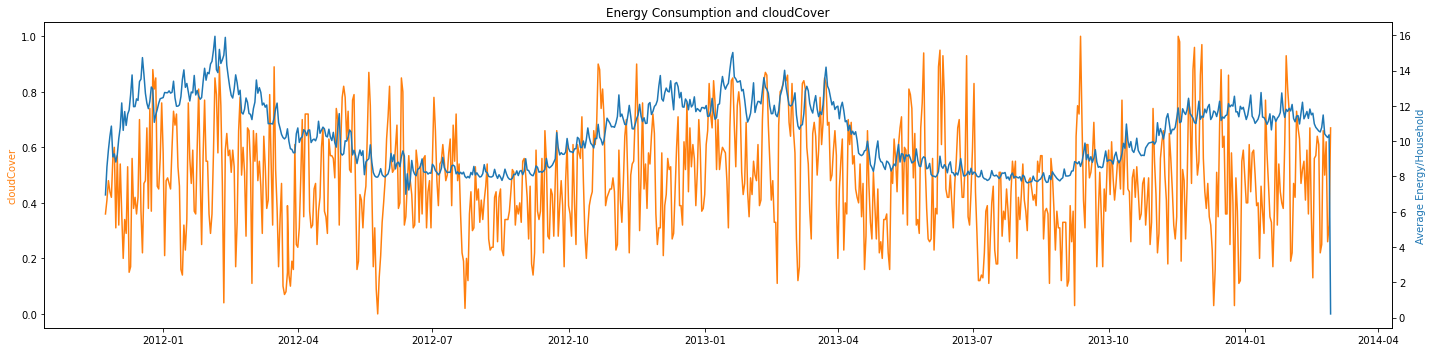

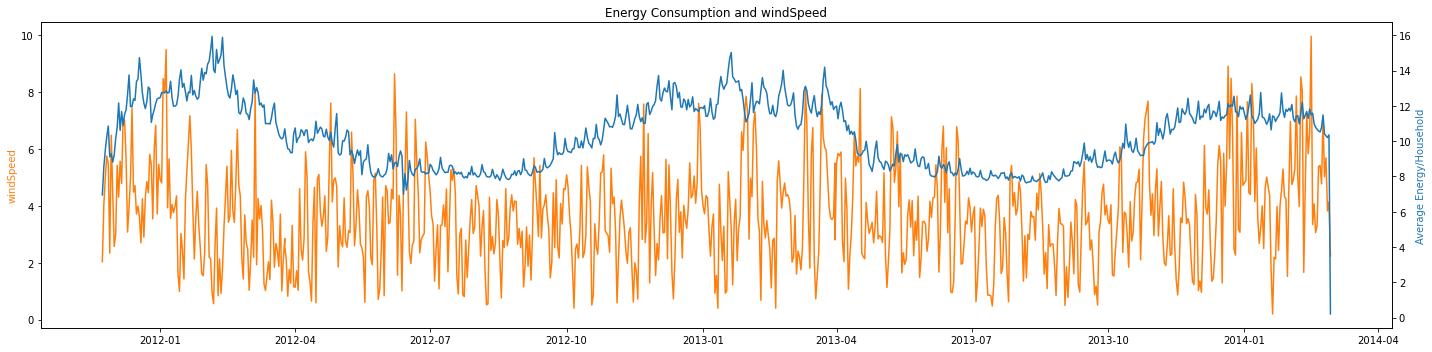

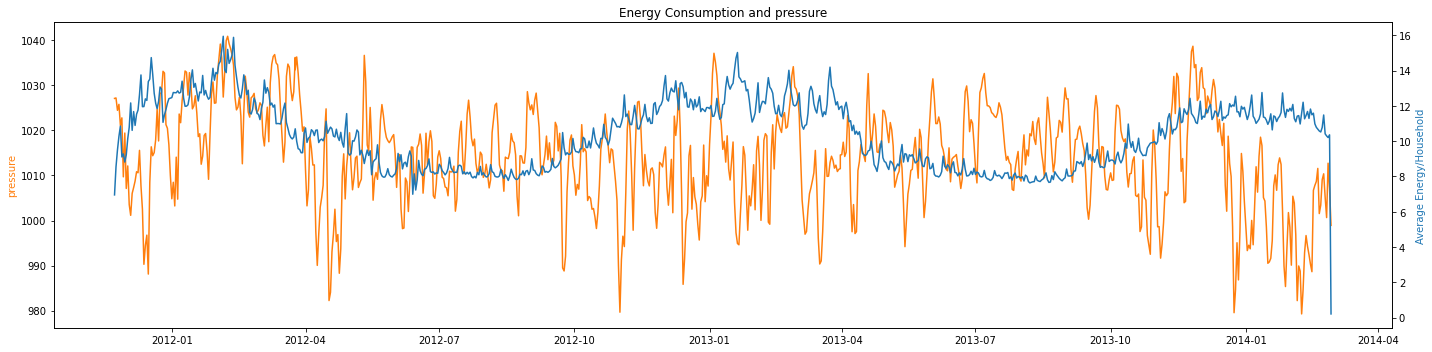

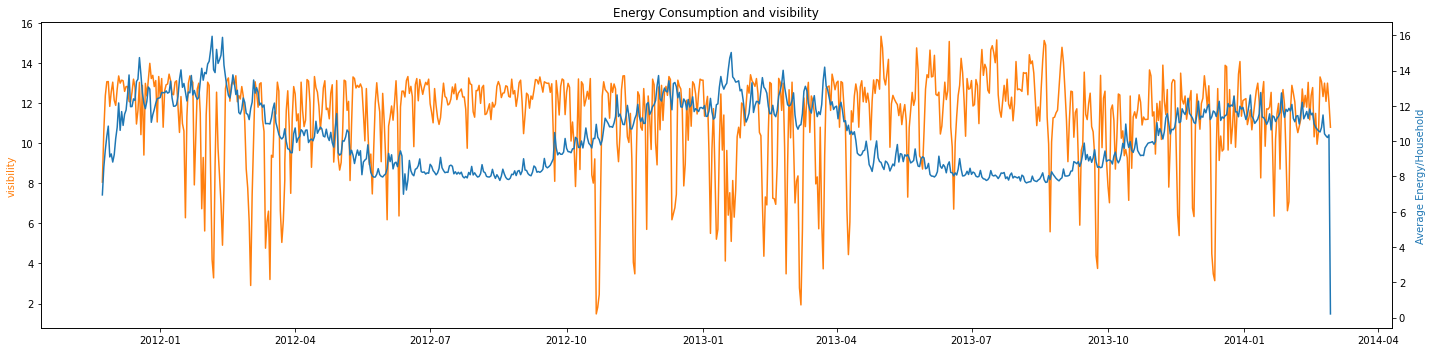

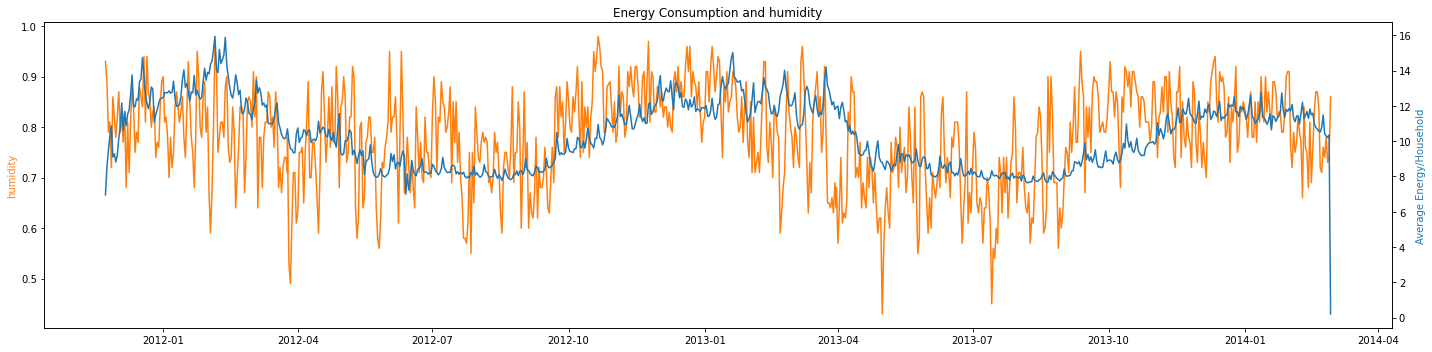

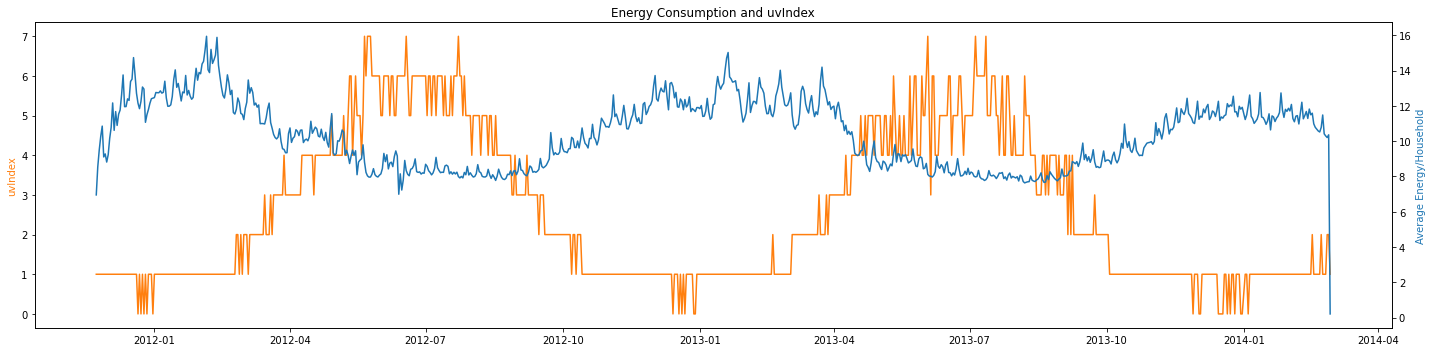

In [112]:
plot_energy_sum(weather_energy, columns_to_plot)

In [113]:
import seaborn as sns
heatmap_cols = ['avg_energy','temperatureMax','dewPoint', 'cloudCover', 'windSpeed',
                'pressure', 'visibility', 'humidity','uvIndex', 'moonPhase','avg_temperature']

In [114]:
def plot_heat_map(dataframe, columns):
    cor_matrix = dataframe[columns].corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

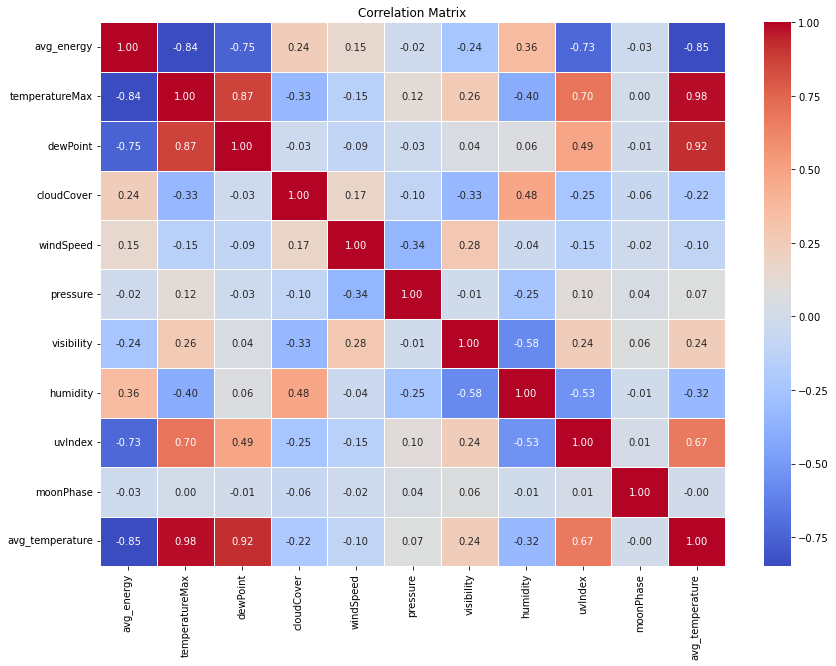

In [115]:
plot_heat_map(weather_energy, heatmap_cols)

In [129]:
#Holiday dataset 
# weather_energy.info()
weather_energy['day'] = pd.to_datetime(weather_energy['day'])



<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 0 to 827
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day                      828 non-null    datetime64[ns]
 1   energy_sum               828 non-null    float64       
 2   LCLid                    828 non-null    int64         
 3   avg_energy               828 non-null    float64       
 4   temperatureMax           828 non-null    float64       
 5   windBearing              828 non-null    int64         
 6   dewPoint                 828 non-null    float64       
 7   cloudCover               828 non-null    float64       
 8   windSpeed                828 non-null    float64       
 9   pressure                 828 non-null    float64       
 10  apparentTemperatureHigh  828 non-null    float64       
 11  visibility               828 non-null    float64       
 12  humidity                 828 non-nul

In [130]:
holiday["Bank_holidays"]=pd.to_datetime(holiday["Bank holidays"])
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bank holidays  25 non-null     object        
 1   Type           25 non-null     object        
 2   Bank_holidays  25 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 728.0+ bytes


In [131]:
#Checking if the the day was Holidayt or not
weather_energy["day_month"]=weather_energy['day'].dt.strftime('%d-%m')
holiday["day_month"]=holiday["Bank_holidays"].dt.strftime('%d-%m')

In [132]:
weather_energy

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,avg_temperature,day_month
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94,7.085,23-11
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,10.745,24-11
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01,10.245,25-11
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05,9.985,26-11
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08,9.005,27-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2014-02-24,51994.547004,4994,10.411403,14.23,183,6.03,0.50,5.02,1005.19,...,4.78,14.23,1.0,8.25,7.99,14.23,5.52,0.82,11.110,24-02
824,2014-02-25,51423.508001,4995,10.294997,11.43,202,5.06,0.62,5.69,1000.65,...,1.67,11.43,1.0,4.17,6.79,10.31,3.89,0.86,9.110,25-02
825,2014-02-26,50943.305995,4993,10.202945,11.29,227,2.74,0.26,3.82,1012.73,...,3.03,11.29,2.0,6.01,4.17,11.29,1.67,0.90,7.730,26-02
826,2014-02-27,51678.185998,4990,10.356350,10.31,224,3.08,0.32,4.14,1007.02,...,0.82,10.31,2.0,3.43,3.93,10.31,1.41,0.93,7.120,27-02


In [137]:
weather_energy['is_holiday'] = weather_energy['day_month'].isin(holiday['day_month']).astype(int)

In [138]:
weather_energy

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,avg_temperature,day_month,is_holiday
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,10.36,1.0,8.24,3.81,10.36,2.18,0.94,7.085,23-11,0
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,12.93,1.0,9.71,8.56,12.93,7.01,0.97,10.745,24-11,0
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,13.03,1.0,7.01,7.46,12.27,4.84,0.01,10.245,25-11,0
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,12.96,1.0,11.59,7.01,12.96,4.69,0.05,9.985,26-11,0
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.54,1.0,1.31,4.47,13.54,2.94,0.08,9.005,27-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2014-02-24,51994.547004,4994,10.411403,14.23,183,6.03,0.50,5.02,1005.19,...,14.23,1.0,8.25,7.99,14.23,5.52,0.82,11.110,24-02,0
824,2014-02-25,51423.508001,4995,10.294997,11.43,202,5.06,0.62,5.69,1000.65,...,11.43,1.0,4.17,6.79,10.31,3.89,0.86,9.110,25-02,0
825,2014-02-26,50943.305995,4993,10.202945,11.29,227,2.74,0.26,3.82,1012.73,...,11.29,2.0,6.01,4.17,11.29,1.67,0.90,7.730,26-02,0
826,2014-02-27,51678.185998,4990,10.356350,10.31,224,3.08,0.32,4.14,1007.02,...,10.31,2.0,3.43,3.93,10.31,1.41,0.93,7.120,27-02,0


In [139]:
weather_energy['is_holiday'].value_counts()

0    784
1     44
Name: is_holiday, dtype: int64

In [143]:

import statsmodels.api as sm
cols_2_plot = ['avg_energy', 'avg_temperature']

In [144]:
def plot_seasonal_decomposition(df, cols_2_plot):
    for col in cols_2_plot:
        print('col:',col)
        decomposed_result = sm.tsa.seasonal_decompose(df[col], period = 30)
        figure = decomposed_result.plot()
    plt.tight_layout()
    plt.show()

col: avg_energy
col: avg_temperature


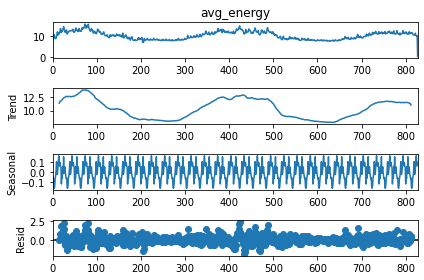

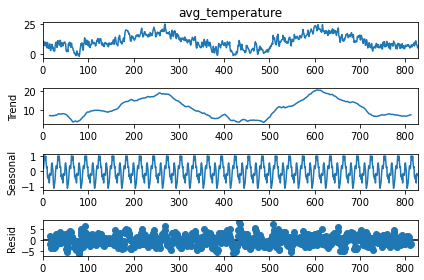

In [145]:
plot_seasonal_decomposition(weather_energy, cols_2_plot)

In [149]:
weather_energy.head(2)


,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,avg_temperature,day_month,is_holiday
0,2011-11-23,90.385,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,10.36,1.0,8.24,3.81,10.36,2.18,0.94,7.085,23-11,0
1,2011-11-24,213.412,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,12.93,1.0,9.71,8.56,12.93,7.01,0.97,10.745,24-11,0


In [156]:
weather_energy = weather_energy[['day',"energy_sum","LCLid","avg_energy","uvIndex",'moonPhase','avg_temperature',
                         "windBearing",
                         "dewPoint",
                         "cloudCover",
                         "windSpeed",
                         "pressure",
                         "humidity","is_holiday",]]

In [157]:
weather_energy

,day,energy_sum,LCLid,avg_energy,uvIndex,moonPhase,avg_temperature,windBearing,dewPoint,cloudCover,windSpeed,pressure,humidity,is_holiday
0,2011-11-23,90.385000,13,6.952692,1.0,0.94,7.085,229,6.29,0.36,2.04,1027.12,0.93,0
1,2011-11-24,213.412000,25,8.536480,1.0,0.97,10.745,204,8.56,0.41,4.04,1027.22,0.89,0
2,2011-11-25,303.993000,32,9.499781,1.0,0.01,10.245,243,7.24,0.48,5.02,1024.47,0.79,0
3,2011-11-26,420.976000,41,10.267707,1.0,0.05,9.985,237,6.96,0.44,5.75,1025.80,0.81,0
4,2011-11-27,444.883001,41,10.850805,1.0,0.08,9.005,256,5.76,0.42,5.48,1021.11,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2014-02-24,51994.547004,4994,10.411403,1.0,0.82,11.110,183,6.03,0.50,5.02,1005.19,0.74,0
824,2014-02-25,51423.508001,4995,10.294997,1.0,0.86,9.110,202,5.06,0.62,5.69,1000.65,0.78,0
825,2014-02-26,50943.305995,4993,10.202945,2.0,0.90,7.730,227,2.74,0.26,3.82,1012.73,0.73,0
826,2014-02-27,51678.185998,4990,10.356350,2.0,0.93,7.120,224,3.08,0.32,4.14,1007.02,0.74,0


In [158]:
weather_energy.to_csv("Smart_meter.csv")